<a href="https://colab.research.google.com/github/besomlu/stock_simulation/blob/main/%EC%B6%94%EC%84%B8%EC%B6%94%EC%A2%85_%EB%A7%A4%EB%A7%A4_%EC%A0%84%EB%9E%B5(QQQ).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

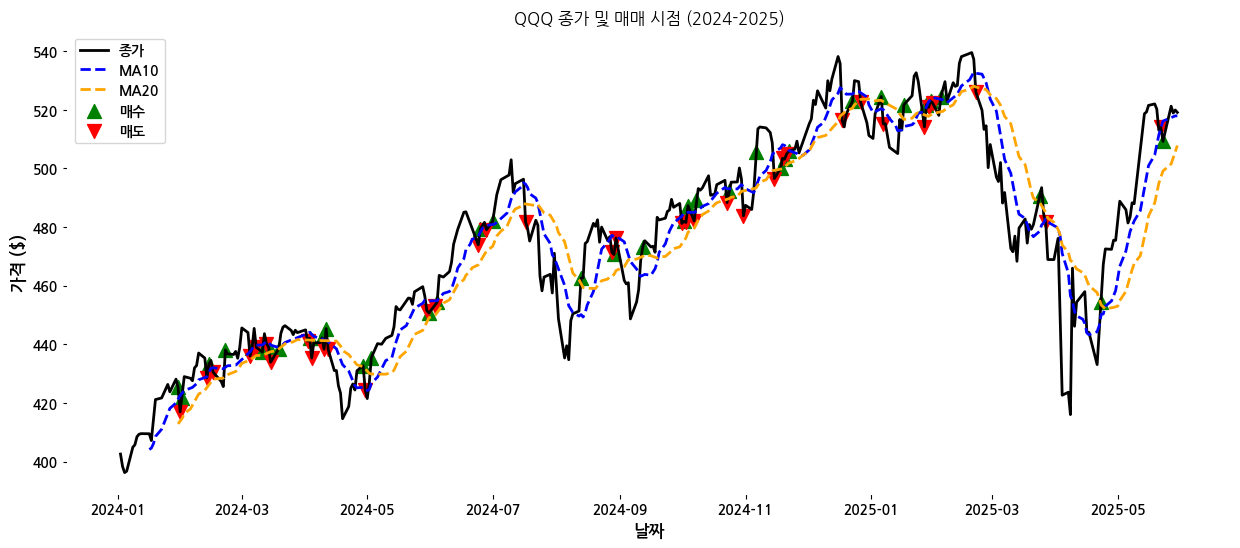

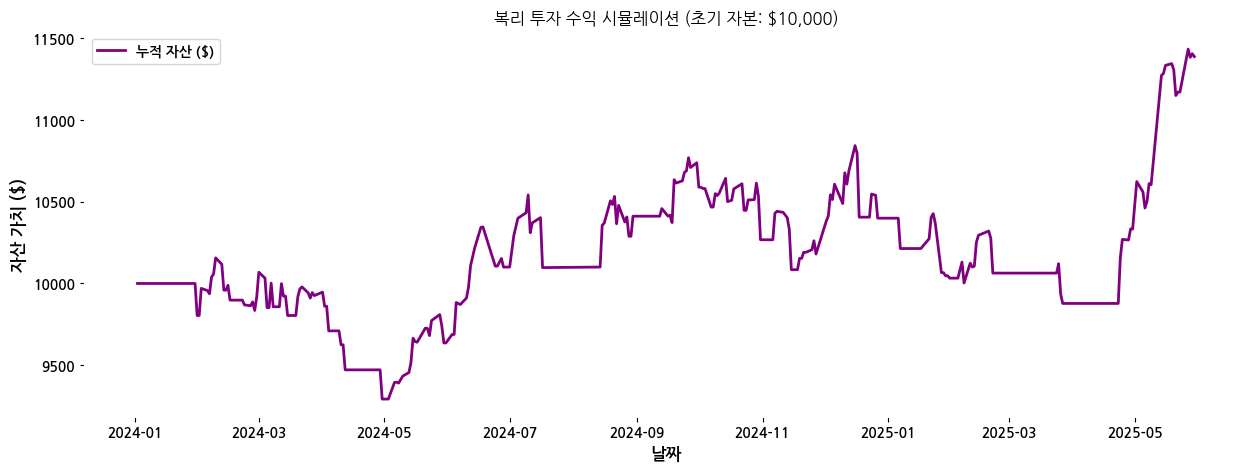

In [7]:
# ✅ 1. 필수 라이브러리 설치
!pip install -q finance-datareader
!apt-get -qq install -y fonts-nanum

# ✅ 2. 나눔고딕 폰트 설정
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib as mpl

font_dirs = ['/usr/share/fonts/truetype/nanum']
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for font in font_files:
    fm.fontManager.addfont(font)

mpl.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# ✅ 3. 데이터 불러오기 (QQQ)
import FinanceDataReader as fdr
import pandas as pd
import numpy as np

df = fdr.DataReader('QQQ', '2024-01-01', '2025-06-01')
df['MA10'] = df['Close'].rolling(10).mean()
df['MA20'] = df['Close'].rolling(20).mean()
df['Signal'] = 0

# ✅ 4. 매수/매도 시점 계산
position = False
for i in range(1, len(df)):
    if not position and df['Close'].iloc[i] > df['MA20'].iloc[i]:
        df.iat[i, df.columns.get_loc('Signal')] = 1  # 매수
        position = True
    elif position and df['Close'].iloc[i] < df['MA10'].iloc[i]:
        df.iat[i, df.columns.get_loc('Signal')] = -1  # 매도
        position = False

# ✅ 5. 매수/매도 날짜 및 가격 추출
buy_dates = df[df['Signal'] == 1].index
sell_dates = df[df['Signal'] == -1].index
buy_prices = df.loc[buy_dates]['Close']
sell_prices = df.loc[sell_dates]['Close']

# ✅ 6. 종가 + 매매 시점 그래프
plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Close'], label='종가', color='black')
plt.plot(df['MA10'], label='MA10', color='blue', linestyle='--')
plt.plot(df['MA20'], label='MA20', color='orange', linestyle='--')
plt.scatter(buy_dates, buy_prices, color='green', marker='^', s=100, label='매수')
plt.scatter(sell_dates, sell_prices, color='red', marker='v', s=100, label='매도')
plt.title('QQQ 종가 및 매매 시점 (2024-2025)')
plt.xlabel('날짜')
plt.ylabel('가격 ($)')
plt.legend()
plt.grid()
plt.show()

# ✅ 7. 복리 수익 시뮬레이션
capital = 10000
cash = capital
position = 0
history = []

for i in range(len(df)):
    signal = df['Signal'].iloc[i]
    price = df['Close'].iloc[i]

    if signal == 1 and cash > 0:  # 매수
        position = cash / price
        cash = 0
    elif signal == -1 and position > 0:  # 매도
        cash = position * price
        position = 0
    total_value = cash + position * price
    history.append(total_value)

# ✅ 수익 그래프
df = df.copy()
df['Portfolio'] = history
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Portfolio'], label='누적 자산 ($)', color='purple')
plt.title('복리 투자 수익 시뮬레이션 (초기 자본: $10,000)')
plt.xlabel('날짜')
plt.ylabel('자산 가치 ($)')
plt.grid()
plt.legend()
plt.show()


Google Colab에서 실행 가능한 파이썬 코드를 만들어줘. 아래 조건을 모두 만족해야 해:

1. 나눔고딕 폰트를 설치하고 폰트매니저에 설치된 폰트를 모두 등록할 것 matplotlib에서 한글이 잘 보이도록 설정할 것
2. FinanceDataReader를 설치하고 사용할 것
3. 종목은 나스닥 QQQ으로 할 것
4. 기간은 2024년 1월 1일부터 2025년 6월 1일까지로 할 것
5. 종가가 20일 이동평균선 상회 시에 매수하고, 10일 이동평균선 하회 시에 매도를 할 것
6. 종가 그래프를 그리고 매수, 매도 시점을 표시할 것
7. 초기 원금을 10,000 USD로 가정하면, 복리 투자 시 수익 그래프도 그릴 것

✅ 포함된 기능 요약

    ✅ 나눔고딕 폰트 설치 및 한글 설정

    ✅ FinanceDataReader 설치 및 사용

    ✅ 종목: QQQ (나스닥 ETF)

    ✅ 기간: 2024-01-01 ~ 2025-06-01

    ✅ 매수: 종가 > MA20, 매도: 종가 < MA10

    ✅ 종가 그래프에 매수/매도 시점 마킹

    ✅ 초기자금 10,000 USD로 복리 수익 시뮬레이션 및 그래프 출력